In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1 = pd.read_csv('drive/My Drive/Colab/BushingDiameter.csv', sep=',')

**Question 1**

In [ ]:
data1.describe()

,Batch 1,Batch 2
count,50.000000,50.000000
mean,1.003360,1.003660
std,0.007714,0.007227
min,0.985000,0.990000
25%,0.999000,1.000000
50%,1.001000,1.005000
75%,1.009000,1.006750
max,1.025000,1.019000


As you can see from this data, both batches appear to have to same mean (this will be tested further later), but all of their other statistics seem to differ slightly. Batch 1 has a higher max and a lower min than Batch 2 and also a higher standard deviation

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 2., 6., 0.,
        0., 0., 4., 8., 4., 0., 5., 2., 0., 1., 0., 5., 5., 0., 0., 0., 0.,
        4., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0.98 , 0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988,
        0.989, 0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997,
        0.998, 0.999, 1.   , 1.001, 1.002, 1.003, 1.004, 1.005, 1.006,
        1.007, 1.008, 1.009, 1.01 , 1.011, 1.012, 1.013, 1.014, 1.015,
        1.016, 1.017, 1.018, 1.019, 1.02 , 1.021, 1.022, 1.023, 1.024,
        1.025, 1.026, 1.027, 1.028, 1.029, 1.03 ]),
 <a list of 50 Patch objects>)

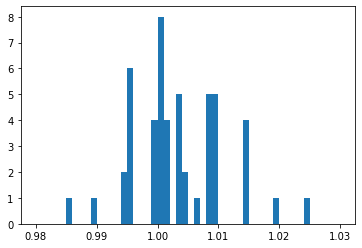

In [ ]:
plt.hist(data1['Batch 1'],range=[0.98, 1.03], bins = 50)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 1., 0., 0., 3., 1.,
        0., 0., 3., 5., 6., 0., 0., 9., 0., 7., 0., 0., 4., 0., 0., 0., 0.,
        4., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.98 , 0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988,
        0.989, 0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997,
        0.998, 0.999, 1.   , 1.001, 1.002, 1.003, 1.004, 1.005, 1.006,
        1.007, 1.008, 1.009, 1.01 , 1.011, 1.012, 1.013, 1.014, 1.015,
        1.016, 1.017, 1.018, 1.019, 1.02 , 1.021, 1.022, 1.023, 1.024,
        1.025, 1.026, 1.027, 1.028, 1.029, 1.03 ]),
 <a list of 50 Patch objects>)

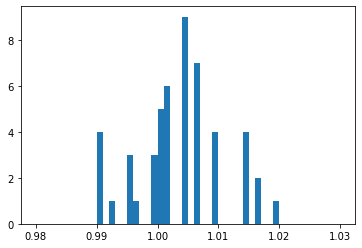

In [ ]:
plt.hist(data1['Batch 2'],range=[0.98, 1.03], bins = 50)

From these graph we can see more of a difference in the two data sets. Batch 1 seems to have a couple values that are more extreme than Batch 2. Batch 2 also appears to be more tightly grouped around the median while Batch one is slightly more spread out.

**Question 2**

To check whether these 2 batches are from the same population, I will be using a t-test. First I will need to compare the variances of the batches to see if they are equal.

In [ ]:
np.var(data1['Batch 1'])/np.var(data1['Batch 2'])

1.1392199163691206

Since the ratio of the variances is close to 1 we can set the "equal_var" to True

For this hypothesis test we will be seeing if we can reject the null hypothesis that the means of both batches are not equal. The random variable is the Bushing diameter.

H0 = Batch 1 and Batch 2 have the same mean.

H1 = Batch 1 and Batch 2 have a different mean.

In [ ]:
stats.ttest_ind(a=data1['Batch 1'], b=data1['Batch 2'], equal_var=True)

Ttest_indResult(statistic=-0.20069320812014205, pvalue=0.8413561524454607)

Since the pvalue is greater than .05 we fail to reject the null hypothesis that Batch 1 and Batch 2 have the same mean. This means that we cannot prove that both batches are not from the same population.

**Question 3**

df = 25 -1 = 24

**A.**

Using the T-table we get:

-3.467 < -2.80 <  -2.797

multiple by -1 to get 

2.797 < 2.80 < 3.467

using Colab:

In [ ]:
a = stats.t.sf(2.797, 24)
b = stats.t.sf(3.467, 24)
print(a,"> P-Value >",b)

0.004999297771713449 > P-Value > 0.0009994503848696217



**B.**

Using the T-table we get:

-2.064 < -1.75 < -1.711

multiple by -1 to get

1.711 < 1.75 < 2.064

using Colab:

In [ ]:
c = stats.t.sf(1.711, 24)
d = stats.t.sf(2.064, 24)
print(c,"> P-Value >",d)

0.04992342563103375 > P-Value > 0.024994804826307313


**C.**

Using the T-table we get:

-2.797 < -2.54 < -2.492

multiple by -1 to get

2.492 < 2.54 < 2.797

using Colab:

In [ ]:
e = stats.t.sf(2.492, 24)
f = stats.t.sf(2.797, 24)
print(e,"> P-Value >",f)

0.010003546080642568 > P-Value > 0.004999297771713449


**D.**

Using the T-table we get:

-2.064 < -2.05 < -1.711

multiple by -1 to get

1.711 < 2.05 < 2.064

using Colab:

In [ ]:
g = stats.t.sf(1.711, 24)
h = stats.t.sf(2.064, 24)
print(e,"> P-Value >",f)

0.010003546080642568 > P-Value > 0.004999297771713449


**Question 4**

In [ ]:
data2 = [13.3987, 13.3957, 13.3902, 13.4015, 13.4001,
13.3918, 13.3965, 13.3925, 13.3946, 13.4002]

**A.**

H0 = mean thickness = 13.4

H1 = mean thickness =/= 13.4

In [ ]:
stats.ttest_1samp(a=data2, popmean=13.4)

Ttest_1sampResult(statistic=-3.0905771237069133, pvalue=0.012917430540578496)

Since the pvalue is less than 0.05 we reject the null hypothesis that the mean thickness is 13.4.

**B.**

df = 10 - 1 = 9

In [ ]:
stats.t.interval(alpha=0.99, df=9, loc=np.mean(data2), scale=stats.sem(data2))

(13.392163154187317, 13.400196845812685)

**C.**

The normality assumption is reasonable for this data based on the nature of manufacturing processes. Most manufacturing processes in terms of physical measurements seem to follow a normal distribution since it is normal for some to be above and some to be below the desired amount, but most should be near the mean or desired amount. 